# Guided Capstone Step 6. Documentation

**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.  Modeling

6.   **Documentation**
  * Review the Results
  * Finalize Code 
  * Finalize Documentation
  * Create a Project Report 
  * Create a Slide Deck for the Executive Audience

In this guided capstone we are going to revisit many of the actions we took in the previous guided capstone steps. This gives you the opportunity to practice the code you wrote to solve the questions in step 4 and 5. 

**<font color='teal'> Start by loading the necessary packages and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [60]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
os.chdir(r"C:\Users\abewo\Documents\GitHub\GuidedCapstone1\Step Two Data Wrangling\data")

## Fit Models with Training Dataset

**<font color='teal'> Using sklearn fit the model you chose in Guided Capstone 5 on your training dataset. This includes: creating dummy features for states if you need them, scaling the data,and creating train and test splits before fitting the chosen model.Also, remember to generate a model performance score(MAE, or explained variance) based on the testing hold-out data set.</font>**

#### Best Model 

In [42]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error

# Model Three, which omits states and summit_elev
df = pd.read_csv('step3_output.csv', index_col=0)
X = df.drop(['Name', 'AdultWeekend', 'state', 'summit_elev'], axis=1)
y = df.AdultWeekend
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
y = y.ravel()
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Explained Variance: " + str(explained_variance_score(y_test, y_pred)))
print("Mean Absolute Error: " + str(mean_absolute_error(y_test, y_pred)))
print("Lm Intercept: " + str(lm.intercept_))

Explained Variance: 0.6380773422196397
Mean Absolute Error: 7.481612884030336
Lm Intercept: 56.06104478290273


## Review the results 

**<font color='teal'> Now, let's predict the Big Mountain Weekend price with our model in order to provide a recommendation to our managers on how to price the `AdultWeekend` lift ticket. First we need to find the row for Big Mountain resort in our data using string contains or string matching.</font>**

***Note: Big Mountain wasn't listed in the original dataset. Whitefish Mountain is the corresponding resort, so I used that one. I had to propogate this listing from earlier steps (Whitefish Mountain was a row deleted in the huge outlier purge in Step 3).

In [43]:
#Big Mountain Resort
big_mountain = df[df['Name'].str.contains('Whitefish Mountain Resort')]
print(big_mountain.head())

                          Name    state  summit_elev  vertical_drop  trams  \
176  Whitefish Mountain Resort  Montana         6817           2353      0   

     fastEight  fastSixes  fastQuads  quad  triple  ...  SkiableTerrain_ac  \
176        0.0          0          3     2       6  ...             3000.0   

     Snow Making_ac  daysOpenLastYear  yearsOpen  averageSnowfall  \
176           600.0             123.0       72.0            333.0   

     AdultWeekday  AdultWeekend  projectedDaysOpen  NightSkiing_ac  clusters  
176          81.0          81.0              123.0           600.0         1  

[1 rows x 26 columns]


**<font color='teal'> Prepare the Big Mountain resort data row as you did in the model fitting stage.</font>**

In [44]:
# scale big mountain data
bm = big_mountain.drop(['Name', 'AdultWeekend', 'state', 'summit_elev'], axis=1)
bm_input = scaler.transform(bm)

**<font color='teal'> Predict the Big Mountain resort `Adult Weekend` price and print it out.</font>** This is our expected price to present to management. Based on our model given the characteristics of the resort in comparison to other ski resorts and their unique characteristics.

In [45]:
# Predicted Big Mountain Adult Weekend Price
big_mountain_pred= model.predict(bm_input)
print(big_mountain_pred)

[82.74638954]


**<font color='teal'> Print the Big Mountain resort actual `Adult Weekend` price.</font>**

In [70]:
# Current Big Mountain Adult Weekend Price
print(big_mountain.AdultWeekend)

176    81.0
Name: AdultWeekend, dtype: float64


**<font color='teal'> As part of reviewing the results it is an important step to generate figures to visualize the data story. We can use the clusters we added to our data frame to create scatter plots for visualizing the Adult Weekend values compared to other characteristics. Run the example below to get you started and build two or three more figures to include in your data story telling.</font>**

In [47]:
# change directory to save figures
os.chdir(r"C:\Users\abewo\Documents\GitHub\GuidedCapstone1\Step Two Data Wrangling\figures")

In [87]:
# define function to make cluster plots
def make_cluster_plot(x, y='AdultWeekend'):
    plt.scatter(df[x], df[y], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
    plt.scatter(big_mountain[x], big_mountain[y], c='black', s=150)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(x + ' by ' + y + ' colored by cluster')
    m, b = np.polyfit(df[x], df[y], 1)
    plt.plot(df[x], m*df[x] + b)
    plt.savefig(fname= (x+'by'+y+'.png'), bbox_inches='tight')
    plt.show()

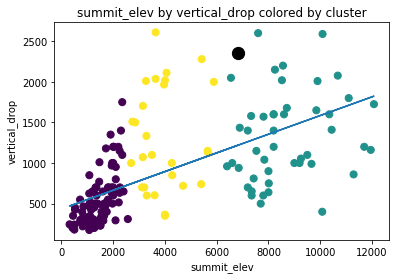

In [82]:
# provided example plot
make_cluster_plot('summit_elev', 'vertical_drop')

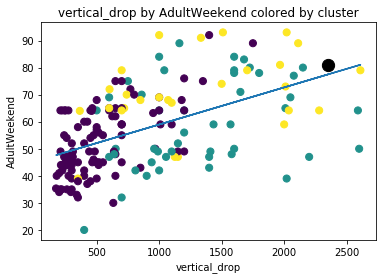

In [88]:
# figure 1
make_cluster_plot('vertical_drop', 'AdultWeekend')

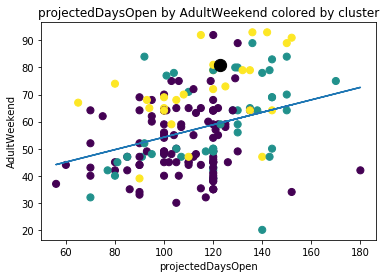

In [84]:
# figure 2
make_cluster_plot('projectedDaysOpen', 'AdultWeekend')

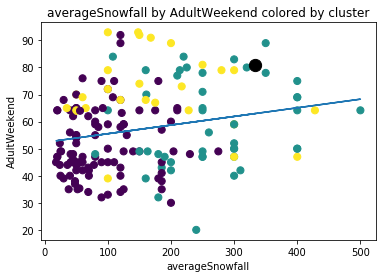

In [85]:
# figure 3
make_cluster_plot('averageSnowfall', 'AdultWeekend')

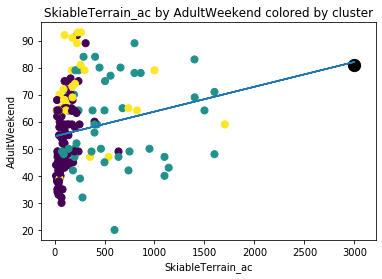

In [86]:
# figure 4
make_cluster_plot('SkiableTerrain_ac')

## Finalize Code

 Making sure our code is well organized and easy to follow is an important step. This is the time where you need to review the notebooks and Python scripts you've created and clean them up so they are easy to follow and succinct in nature. Addtionally, we will also save our final model as a callable object using Pickle for future use in a data pipeline. Pickle is a module that serializes (and de-serializes) Python objects so that they can become executable objects like functions. It's used extensively in production environments where machine learning models are deployed on an industrial scale!**<font color='teal'> Run the example code below to save out your callable model. Notice that we save it in the models folder we created in our previous guided capstone step.</font>** 

In [53]:
# save callable model
os.chdir(r"C:\Users\abewo\Documents\GitHub\GuidedCapstone1\Step Two Data Wrangling")
import pickle
s = pickle.dumps(model)
from joblib import dump, load
dump(model, 'models/regression_model_adultweekend.joblib') 

['models/regression_model_adultweekend.joblib']

## Finalize Documentation

For model documentation, we want to save the model performance metrics as well as the features included in the final model. You could also save the model perfomance metrics and coefficients fo the other models you tried in case you want to refer to them later. **<font color='teal'> Create a dataframe containing the coefficients and the model performance metrics and save it out as a csv file, then upload it to your github repository.</font>** 

In [54]:
# create df of model 3 performance
model3 = (pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient'])).sort_values(by=['Coefficient'],ascending=False)
x=explained_variance_score(y_test, y_pred)
y=mean_absolute_error(y_test, y_pred)
xstats = pd.DataFrame([x], index=['Explained Variance'],columns=['Model Performance Stats'])
ystats = pd.DataFrame([y], index=['Mean Absolute Error'],columns=['Model Performance Stats'])
model3 = model3.append(xstats)
model3 = model3.append(ystats)

In [55]:
# save df of model performance to csv
os.chdir(r"C:\Users\abewo\Documents\GitHub\GuidedCapstone1\Step Six Documentation")
model3.to_csv('Model3_Coefficients_and_Performance.csv')